<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),it contains the following columns:<br>
<ul>
<li>id:movie's id</li>
<li>imdb_id:movie's id in imdb</li>
<li>popularity:movie popularity rank</li>
<li>budget	:movie's budget></li>
<li>revenue: movie's revenue</li>
<li>original_title:movie's title</li>
<li>cast:main actors</li>
<li>homepage:movie's official websites</li>
<li>director: director's name</li>
<li>tagline	:movie's tagline</li>
<li>keywords:movie keywords</li>
<li>overview:brief overview of the movie</li>
<li>runtime: movie duration</li>
<li>genres: movie genre</li>
<li>production_companies:name of company production</li>
<li>release_date:date of movie release</li>
<li>vote_count: number of voters</li>
<li>vote_average:average vote rank</li>
<li>release_year:year of release</li>
<li>budget_adj: revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time</li>
<li>revenue_adj:revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time</li>
 <ul>


### Question(s) for Analysis
  1. What's the most popular genres over years?
  2. what is the relashionship between budget and popularity/votes
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling






In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


exploring data

In [3]:
#checking dataframe datatype
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
#checking dataframe size
df.shape

(10866, 21)

In [5]:
#checking nan values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#checking duplicated values
df.duplicated().sum()

1

In [7]:
#checking for zero values number 
for column in df:
    count = (df[column]==0).sum()
    print("number of zeros for columns",column,"is",count)

number of zeros for columns id is 0
number of zeros for columns imdb_id is 0
number of zeros for columns popularity is 0
number of zeros for columns budget is 5696
number of zeros for columns revenue is 6016
number of zeros for columns original_title is 0
number of zeros for columns cast is 0
number of zeros for columns homepage is 0
number of zeros for columns director is 0
number of zeros for columns tagline is 0
number of zeros for columns keywords is 0
number of zeros for columns overview is 0
number of zeros for columns runtime is 31
number of zeros for columns genres is 0
number of zeros for columns production_companies is 0
number of zeros for columns release_date is 0
number of zeros for columns vote_count is 0
number of zeros for columns vote_average is 0
number of zeros for columns release_year is 0
number of zeros for columns budget_adj is 5696
number of zeros for columns revenue_adj is 6016


In [8]:
#counting frequency of values in genres
df.genres.value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64


### Data Cleaning

 

there are some columns which will not help us in the data analysis process such
as id, id_imdb , homepage ,overview , keywords, tagline let's drop them


In [9]:
#drop irrelevant columns
df.drop(
    ['id','homepage','tagline','production_companies','keywords','overview'
     ,'imdb_id'], inplace = True, axis = 1)

In [10]:
#set date format to date instead of object
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
#rounding values of adjusted revenue and budget
df.budget_adj=df.budget_adj.round()
df.revenue_adj=df.revenue_adj.round()
df['budget_adj']=df.budget_adj.astype(int)
df['revenue_adj'] =df.revenue_adj.astype(int)


In [12]:
#rounding values of popularity 
df.popularity=df.popularity.round(2)

In [13]:
#droping nan values
df.dropna(inplace = True)

In [14]:
#droping zero values
zero = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]
df.drop(zero.index,inplace=True)


In [15]:
#drop duplicated raws
df.drop_duplicates()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445893
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723130
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.67,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,2066-06-21,74,7.5,1966,50385110,226643572
10828,0.40,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,2066-07-13,46,6.3,1966,20154044,87334191
10829,0.40,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,2066-12-17,36,6.9,1966,31258922,40308088
10835,0.30,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,80616176,134360294


In [16]:
#df.head()

In [17]:
#df.info

In [18]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192839,3.724698e+07,1.077871e+08,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.322919e+08
std,1.475489,4.221167e+07,1.766030e+08,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.142414e+08
min,0.000000,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.000000e+00,-2.147484e+09
25%,0.460000,1.000000e+07,1.363273e+07,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.824836e+07
50%,0.800000,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.164694e+07
75%,1.370000,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.626769e+08
max,32.990000,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,1.907006e+09


<a id='eda'></a>
## Exploratory Data Analysis


let's explore the average votes of our dataset movies 

<AxesSubplot:>

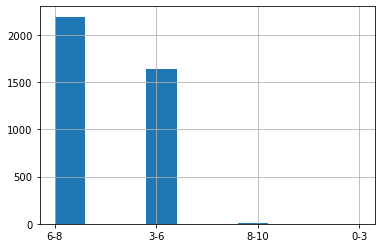

In [19]:
#drawing histogramme
bins=[0,3,6,8,10]
vote_labels=["0-3","3-6","6-8","8-10"]
votes=pd.cut(df['vote_average'],bins,labels=vote_labels)
votes.hist()

most of movies are ranked betwen 3 and 8 

1. what are the most popular genres each year ?

In [20]:
#foction that split values in genres and put each value in separate column
def seprate_column(col):
    new_cols=df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}")
    return new_cols
df_genre = seprate_column('genres')
df_genre

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10822,Drama,None,None,None,None
10828,Mystery,Thriller,None,None,None
10829,Action,Western,None,None,None
10835,Action,Adventure,Drama,War,Romance


assuming that the first value of df_genres is the dominant genre, we are going 
to replace current values of genre column with it.

In [21]:
df['genres']=df_genre['genres_1']

because we have a lot of years , we will split the time into intervals of decade

In [22]:
print(df.release_year.min())
print(df.release_year.max())

1960
2015


In [23]:
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df['release_year'] = pd.cut(x=df['release_year'],bins=[1960,1970,1980,1990,2000,2010,2015],labels=['1960s','1970s','1980s','1990s','2000s','2010s'])

now we will sort data to see genres popularity according to years bins

In [24]:
genre_info=df.groupby(["release_year","genres"])['popularity'].count().unstack()

now we are going to visualize the data

Text(0.5, 1.0, 'genres popularity throughout decades')

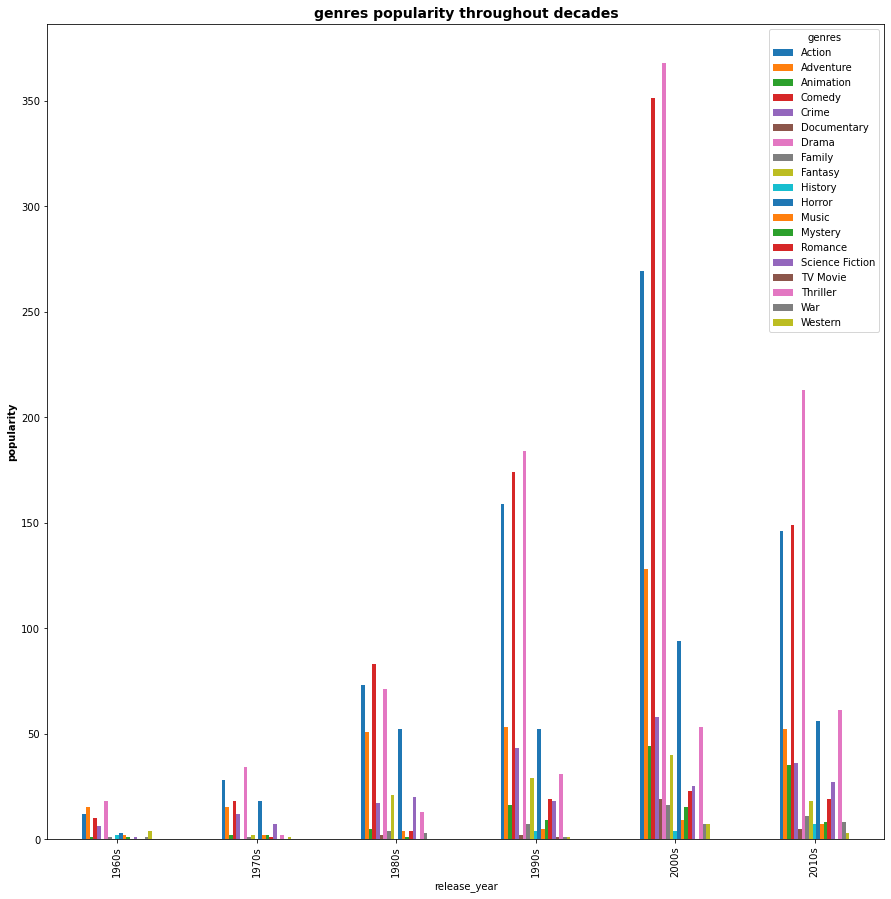

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
genre_info.plot(kind='bar',ax=ax);
ax.set_ylabel('popularity',fontweight ='bold');
plt.title("genres popularity throughout decades", fontsize = 14, weight = "bold")


In [26]:
#most popular genre in every decade
genre_info.idxmax(axis = 1)

release_year
1960s     Drama
1970s     Drama
1980s    Comedy
1990s     Drama
2000s     Drama
2010s     Drama
dtype: object

In [27]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2010s,137999939,1392445893
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,2010s,137999939,348161292


 2. Is there a Correlation between budget and Popularity?

In [28]:
#fonctipon that plot a scatter 
def scatter_RP(A,B,str1,str2,str3):
    plt.figure(figsize = (10, 10))  
    plt.scatter(A,B,alpha = 0.6) 
    plt.title(str1, fontsize = 14, weight = "bold")
    plt.xlabel(str2, weight = "bold")
    plt.ylabel(str3, weight = "bold")
    plt.show()

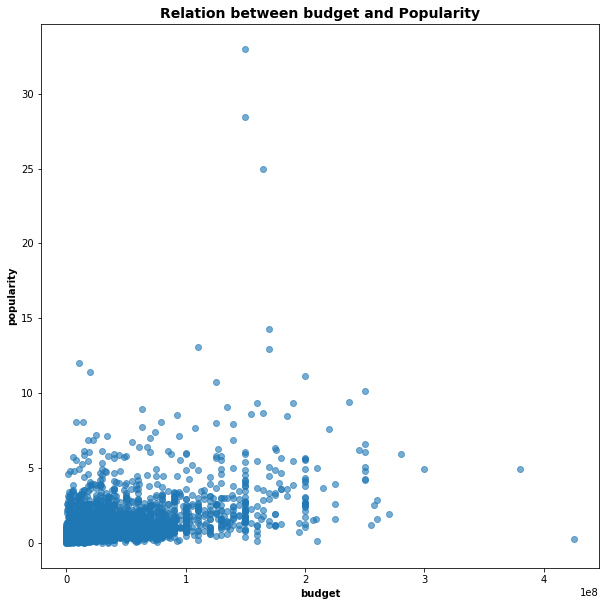

In [29]:
scatter_RP(df['budget'], df['popularity'],"Relation between budget and Popularity","budget","popularity")

so we notice the correlation is positive however not significate 

3. Is there a Correlation between budget and votes?

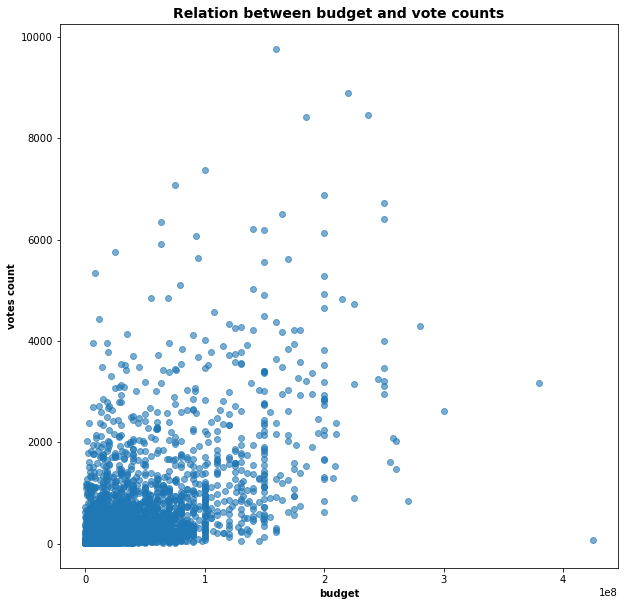

In [30]:
#plotting scatter 
scatter_RP(df['budget'], df['vote_count'],"Relation between budget and vote counts","budget","votes count")

it looks that there is a positive correlation between budget and vote counts

### lets look for correlation in numeric way to make sure of correlation value

In [31]:
#checking in numeric way 
corr=df[df['budget'] != 0].corr()
corr['budget'].sort_values(ascending=False)

budget          1.000000
budget_adj      0.958483
revenue         0.688395
vote_count      0.556684
revenue_adj     0.495097
popularity      0.446532
runtime         0.261501
vote_average    0.023697
Name: budget, dtype: float64

0.45<0.5 is not a significant value , so there is no strong correlation between budget and popularity , while 0.55>0.5 is significant ,hence there is strong correlation between budget and popularity

<a id='conclusions'></a>
## Conclusions

although the dataset contains more  than 10 000 rows , it difficult to draw conclusions from it because of :
1. significant number of the dataset columns are irrelevant for  analysis
2. a lot of values are null or non existant can cause error in conclusions

## Conclusive Insights from our Analysis based on our cleaned data

throughout my analysis ,I concluded that :
1.  movie genres popularity varies overtime period but drama occurs more to be the most popular
2. the budget of the movie is important to have good votes for movie and movie's succes but not necessarily in its popularity.

we can have more useful info by adding recent years information since there is huge change in cinema's world.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295